In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('ggplot')
#bnotes = pd.read_csv('/content/drive/MyDrive/PTT.BK.csv')
bnotes = pd.read_csv('/content/drive/MyDrive/AI Tech Project/PTT.BK.csv')
print(bnotes.head())
#print(bnotes['class'].unique())

         Date   Open   High    Low  Close  Adj Close    Volume
0  2021-03-15  41.75  42.00  41.00  41.25  39.222187  80602500
1  2021-03-16  41.25  41.25  40.50  40.75  38.746765  63962400
2  2021-03-17  40.50  40.75  40.00  40.50  38.509056  94213200
3  2021-03-18  40.75  41.25  40.50  40.50  38.509056  48932200
4  2021-03-19  40.00  40.50  39.75  40.50  38.509056  80270400


In [ ]:
# Drop the columns that we don't use
bnotes.drop(['Date'], axis = 1, inplace = True)
bnotes.drop(['Adj Close'], axis = 1, inplace = True)
bnotes.drop(['Volume'], axis = 1, inplace = True)
bnotes.head()

,Open,High,Low,Close
0,41.75,42.00,41.00,41.25
1,41.25,41.25,40.50,40.75
2,40.50,40.75,40.00,40.50
3,40.75,41.25,40.50,40.50
4,40.00,40.50,39.75,40.50


In [ ]:
# Define x and y
# y is what column do we want to predict
# x is the other columns except the one we want to predict
x=bnotes.drop(['Close'], axis=1)
y=bnotes['Close']
print(f"x---------------------------{len(x)}\n{x.head()}")
print(f"y---------------------------{len(y)}\n{y.head()}")

x---------------------------243
    Open   High    Low
0  41.75  42.00  41.00
1  41.25  41.25  40.50
2  40.50  40.75  40.00
3  40.75  41.25  40.50
4  40.00  40.50  39.75
y---------------------------243
0    41.25
1    40.75
2    40.50
3    40.50
4    40.50
Name: Close, dtype: float64


In [ ]:
# Define x_test, x_train, y_test and y_train data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)
print(f"x_test---------------------------{len(x_test)}\n{x_test.head()}")
print(f"x_train---------------------------{len(x_train)}\n{x_train.head()}")
print(f"y_test---------------------------{len(y_test)}\n{y_test.head()}")
print(f"y_train---------------------------{len(y_train)}\n{y_train.head()}")

x_test---------------------------49
      Open   High    Low
65   40.00  40.25  39.50
59   41.00  42.00  40.75
191  37.75  38.25  37.75
111  38.25  38.50  37.50
112  37.50  38.25  37.25
x_train---------------------------194
      Open   High    Low
29   39.75  40.75  39.50
42   39.75  39.75  38.75
115  37.75  38.25  37.50
165  38.00  38.25  37.50
221  40.25  40.50  40.00
y_test---------------------------49
65     40.00
59     41.25
191    38.25
111    37.50
112    38.00
Name: Close, dtype: float64
y_train---------------------------194
29     40.50
42     39.00
115    37.50
165    37.75
221    40.25
Name: Close, dtype: float64


In [ ]:
# MLP
model = MLPRegressor(random_state=1)
model.fit(x_train.values, y_train.values)
pred = model.predict(x_test.values)

In [ ]:
pred_concat = pd.concat([y_test.reset_index(),pd.Series(pred, name = "Predicted")],axis=1)
pred_concat.head()

,index,Close,Predicted
0,65,40.00,40.994186
1,59,41.25,42.302326
2,191,38.25,38.959092
3,111,37.50,39.085264
4,112,38.00,38.650108


In [ ]:
# Sort the index
concat_sorted = pred_concat.sort_values(["index"], ascending=True)
print(concat_sorted)

    index  Close  Predicted
32      3  40.50  41.933088
46     19  39.00  40.223199
26     26  38.75  39.819159
11     31  39.50  41.318087
34     32  39.75  40.795154
39     41  39.75  40.590146
20     46  38.75  39.966203
1      59  41.25  42.302326
48     62  39.75  40.847142
30     64  40.00  41.361133
0      65  40.00  40.994186
16     69  39.25  40.590146
44     75  37.25  39.004398
18     81  37.50  38.277185
9      83  35.75  37.029299
13     85  36.25  37.249203
12     88  35.50  36.368264
35     96  34.75  35.765192
17     97  34.50  35.686357
8      99  35.25  35.875144
40    110  38.25  39.452212
3     111  37.50  39.085264
4     112  38.00  38.650108
24    125  39.50  40.045038
41    128  40.50  41.419097
37    140  39.50  40.737190
21    142  40.00  40.758062
6     150  38.00  39.305168
23    152  38.00  39.048172
7     160  37.50  39.027301
5     161  38.00  38.760060
10    163  38.00  39.216088
15    182  37.50  38.424229
14    185  37.00  38.366266
42    186  37.50  38

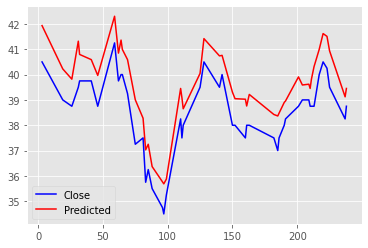

In [ ]:
# Plot the graph to compare the actual and predicted values
plt.plot(concat_sorted['index'],concat_sorted['Close'],color='Blue',label='Close')
plt.plot(concat_sorted['index'],concat_sorted['Predicted'],color='Red',label='Predicted')
plt.legend()
plt.plot();

In [ ]:
y_test_array = y_test.to_numpy()
y_test_array[1]-pred[1]

-1.0523261454054165

In [ ]:
# Mean Squared Error estimation
i=0
MSE=0
for i in range(len(y_test)):
  MSE = MSE+((pred[i]-y_test_array[i])**2)
MSE = MSE/len(y_test)
print("MSE:",MSE)

MSE: 1.2493735384988933


In [ ]:
import math
# Root Mean Squared Error estimation
RMSE = math.sqrt(MSE)
print("RMSE:",RMSE)

RMSE: 1.1177537915385898


In [ ]:
# Mean Absolute Error estimation
i=0
MAE = 0
for i in range(len(y_test)):
  MAE = MAE+(abs(pred[i]-y_test_array[i]))
MAE = MAE/len(y_test)
print("MAE:",MAE)

MAE: 1.0756620737237785


In [ ]:
model.score(x_test.values, y_test.values)

0.4663086125631202

In [ ]:
op=input('Enter the opening price: ')
print(f'Opening price is {op}.\n')
hi=input('Enter the high price: ')
print(f'High price is {hi}.\n')
lo=input('Enter the low price: ')
print(f'Low price is {lo}.\n')
clo=model.predict(np.array([[op,hi,lo]],dtype=float))
print(f'Predicted closing price is {clo[0]}.')

Enter the opening price: 37.5
Opening price is 37.5.

Enter the high price: 37.75
High price is 37.75.

Enter the low price: 37
Low price is 37.

Predicted closing price is 38.42422918431194.
